In [4]:
import numpy as np
import pandas as pd

In [6]:
#Import the dataset
test_df = pd.read_csv('C:\\Users\\supri\\Desktop\\test.csv')
train_df = pd.read_csv('C:\\Users\\supri\\Desktop\\train.csv')
combine = [train_df,test_df]

In [7]:
train_df['Sex'].str.get_dummies().corrwith(train_df['Survived']/train_df['Survived'].max())

female    0.543351
male     -0.543351
dtype: float64

<Axes: xlabel='Sex', ylabel='Survived'>

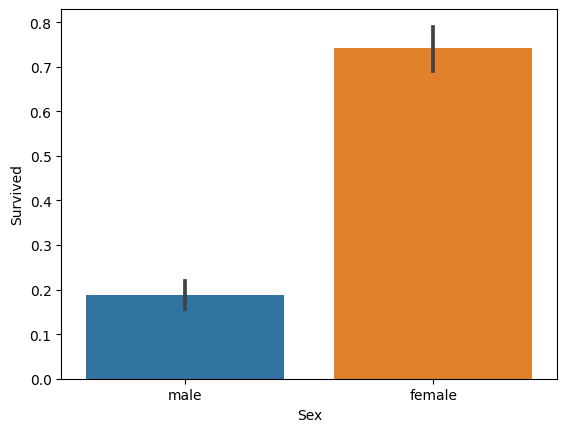

In [10]:
#For Visualisation import seaborn library
import seaborn as sns   
import matplotlib.pyplot as plt
sns.barplot(x = train_df['Sex'], y = train_df['Survived'])

<Axes: xlabel='Age', ylabel='Survived'>

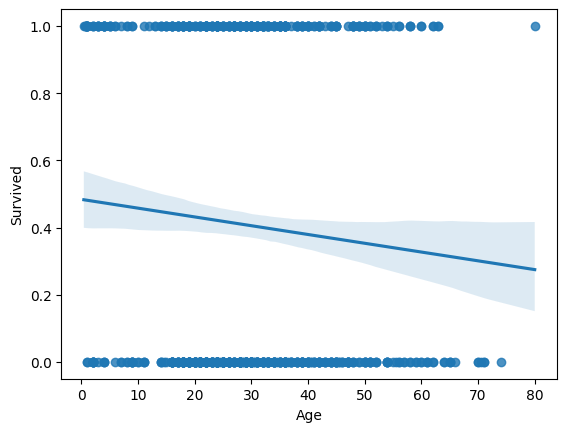

In [12]:
sns.regplot(x = train_df['Age'], y = train_df['Survived'])

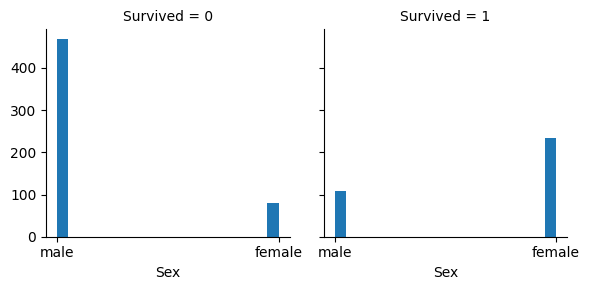

In [14]:
#Multi-plot grids
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist,'Sex',bins=20)

In [16]:
# To implement naive bayes on Titanic data set, first we need to preprocess the data
#Data Preprocessing
#Removing few features from the raw data
train_df = train_df.drop(['Ticket', 'Cabin','Parch','SibSp', 'Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin','Parch','SibSp', 'Name'], axis=1)
combine = [train_df,test_df]

In [18]:
#Converting Categorical Feature
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0}).astype(int)

In [19]:
#Checking any Null values present in the dataset
print(train_df.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64


In [20]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [21]:
#Replacing missing values in Embarked Column
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [22]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [24]:
meanAge = int(train_df.Age.dropna().mean())
print('Mean Age = ',meanAge)

Mean Age =  29


In [25]:
#Replacing missing values in Age column with mean and in Fare column with median
for dataset in combine:
    dataset['Age'] = dataset['Age'].fillna(meanAge)
    dataset['Fare'] = dataset['Fare'].fillna(test_df['Fare'].dropna().median())

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [29]:
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test  = test_df.drop('PassengerId', axis=1).copy()
gaussian = GaussianNB() 
gaussian.fit(X_train,y_train)  
y_pred = gaussian.predict(X_test)  
gaussian.score(X_train,y_train)

0.77665544332211